In [39]:
import pandas as pd

In [40]:
data = pd.read_csv('MU.csv')


In [41]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-09,59.000000,60.540001,57.740002,59.150002,58.662289,33107200
1,2022-08-10,60.000000,61.560001,59.389999,61.400002,60.893734,17418400
2,2022-08-11,62.000000,64.099998,62.000000,62.320000,61.806152,18298500
3,2022-08-12,62.660000,65.419998,62.230000,65.040001,64.503723,16194000
4,2022-08-15,64.699997,65.120003,63.889999,64.699997,64.166527,9689100


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [43]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

data = data.ffill()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [44]:
import numpy as np

In [45]:
data['Price_Change'] = data['Close'].pct_change() * 100

In [46]:
data['Price_Change'].head()

0         NaN
1    3.803888
2    1.498368
3    4.364572
4   -0.522761
Name: Price_Change, dtype: float64

In [47]:
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))


In [48]:
data['Close_Lag1'] = data['Close'].shift(1)
data['Close_Lag7'] = data['Close'].shift(7)
data['Close_Lag30'] = data['Close'].shift(30)

In [49]:
data['Close'].head()

0    59.150002
1    61.400002
2    62.320000
3    65.040001
4    64.699997
Name: Close, dtype: float64

In [50]:
data['Close_Lag7'].head(8)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7    59.150002
Name: Close_Lag7, dtype: float64

In [51]:
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()

In [52]:
data['MA7'].head(10)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6    62.584286
7    63.131429
8    63.004285
9    62.431428
Name: MA7, dtype: float64

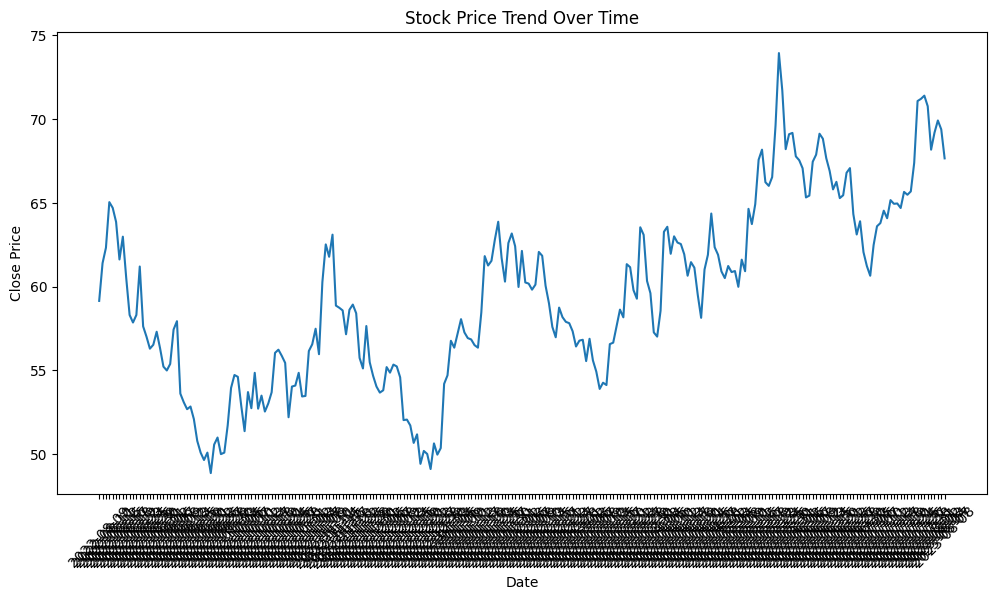

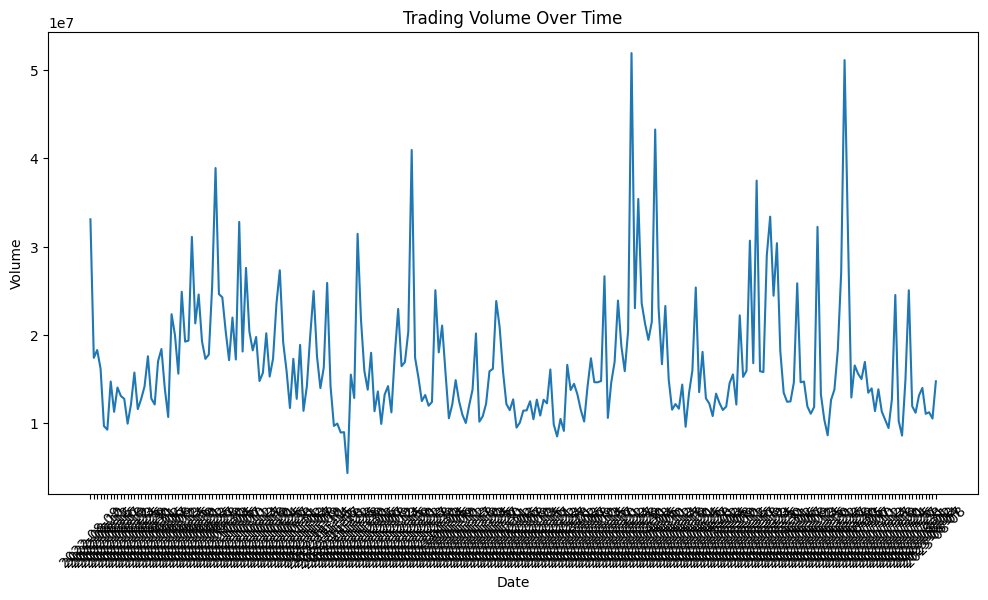

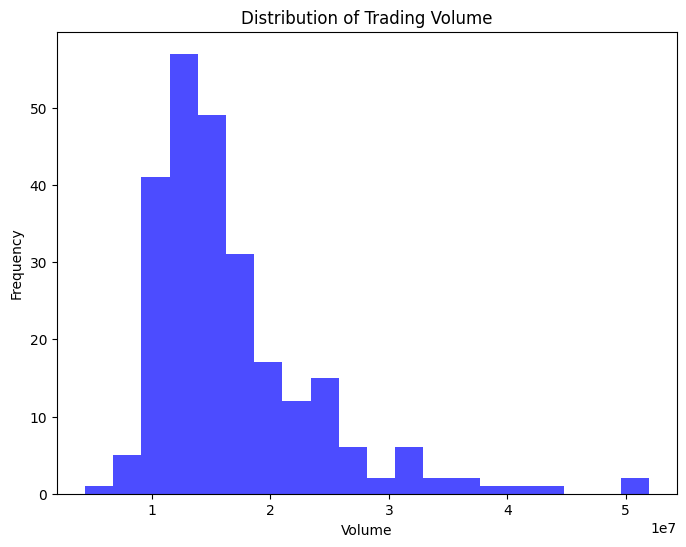

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=data)
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=data)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(data['Volume'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()


<ipython-input-54-5e6a08eb1714>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


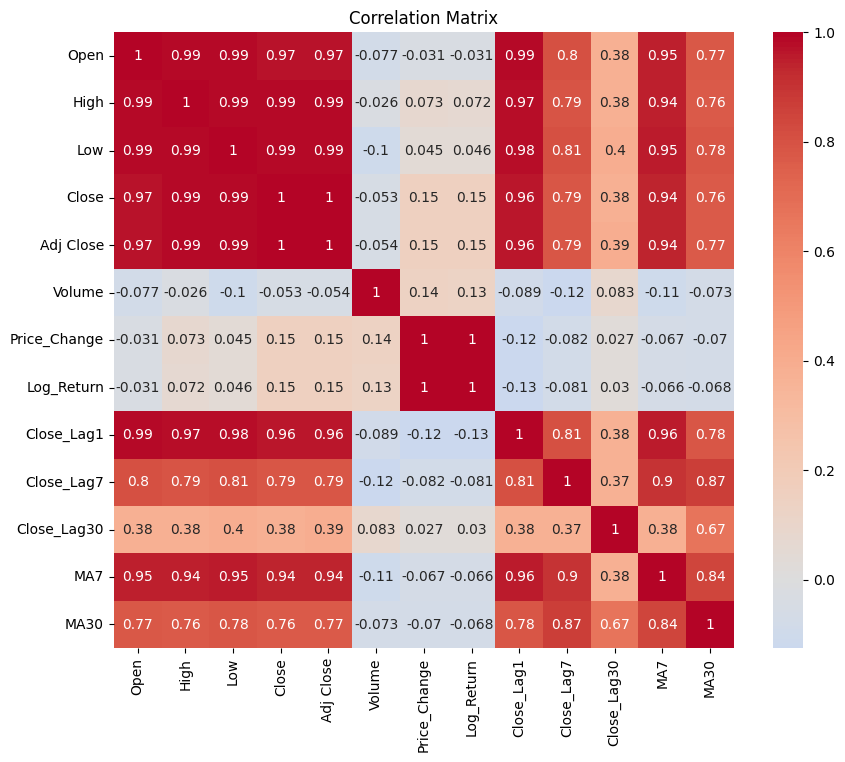

In [54]:
correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

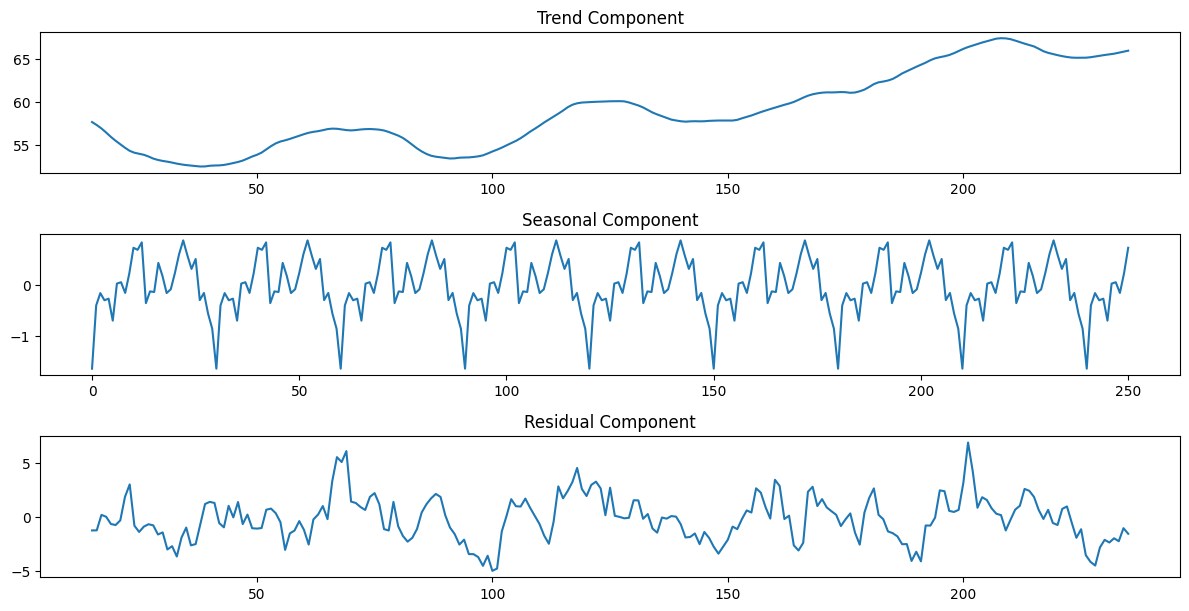

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(data['Close'], model='additive', period=30)


plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.trend)
plt.title('Trend Component')
plt.subplot(412)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.subplot(413)
plt.plot(result.resid)
plt.title('Residual Component')
plt.tight_layout()
plt.show()


In [56]:
data['Volume_Lag1'] = data['Volume'].shift(1)
data['Volume_Lag7'] = data['Volume'].shift(7)
data['Volume_Lag30'] = data['Volume'].shift(30)

In [57]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Log_Return,Close_Lag1,Close_Lag7,Close_Lag30,MA7,MA30,Volume_Lag1,Volume_Lag7,Volume_Lag30
0,2022-08-09,59.000000,60.540001,57.740002,59.150002,58.662289,33107200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-10,60.000000,61.560001,59.389999,61.400002,60.893734,17418400,3.803888,0.037333,59.150002,NaN,NaN,NaN,NaN,33107200.0,NaN,NaN
2,2022-08-11,62.000000,64.099998,62.000000,62.320000,61.806152,18298500,1.498368,0.014873,61.400002,NaN,NaN,NaN,NaN,17418400.0,NaN,NaN
3,2022-08-12,62.660000,65.419998,62.230000,65.040001,64.503723,16194000,4.364572,0.042720,62.320000,NaN,NaN,NaN,NaN,18298500.0,NaN,NaN
4,2022-08-15,64.699997,65.120003,63.889999,64.699997,64.166527,9689100,-0.522761,-0.005241,65.040001,NaN,NaN,NaN,NaN,16194000.0,NaN,NaN


In [58]:
short_ema = data['Close'].ewm(span=12, adjust=False).mean()
long_ema = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = short_ema - long_ema


delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Close'])
y = data['Close']
X = X.drop(columns=['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Date', 'Close'])
y = data['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train_imputed, y_train)


RandomForestRegressor(random_state=42)

In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform



In [62]:

y_pred = model.predict(X_test_imputed)


Mean Absolute Error: 0.17244750647059215
Root Mean Squared Error: 0.21596318571561798


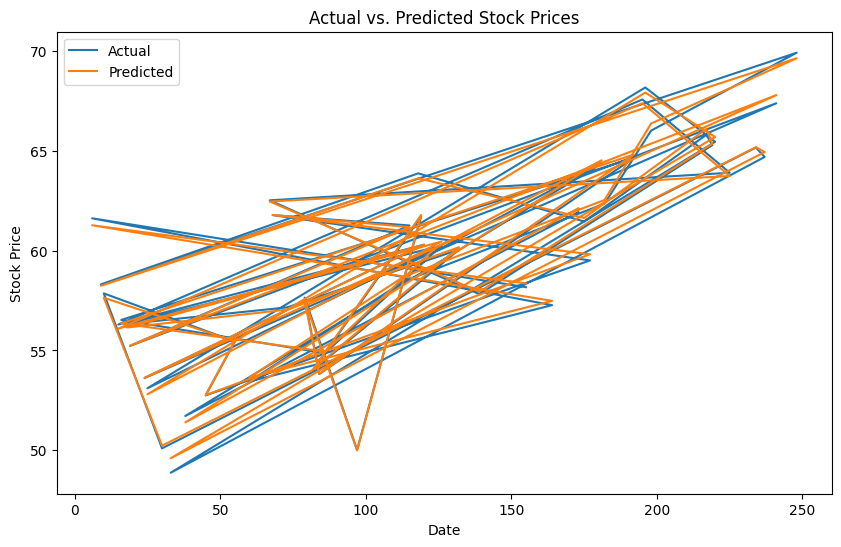

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)

grid_search.fit(X_train_imputed, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [70]:
y_pred_best = best_model.predict(X_test_imputed)


mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Optimized Model - Mean Absolute Error:", mae_best)
print("Optimized Model - Root Mean Squared Error:", rmse_best)


Optimized Model - Mean Absolute Error: 0.1600790534792927
Optimized Model - Root Mean Squared Error: 0.20567430755413632
